# **Informe de Análisis de Evasión de Clientes - Telecom X**

## 🔹Introducción

El presente informe tiene como objetivo analizar el fenómeno de evasón de clientes (churn) en la empresa Telecom X. A través de la limpieza, transformación y visualización de los datos, buscamos entender los factores que influyen en la decisión de los clientes de abandonar el servicio.

---

## **🔹1. Importación de Datos y Vista Inicial** 

Se importó el dataset desde un archivo CSV. Se realizó una inspección inicial para entender la estructura de los datos y detectar posibles valores faltantes o inconsistencias.

---

#### **EXTRACCIÓN DE DATOS**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL de la API (corrigiendo el error en 'hhttps')
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Cargamos los datos directamente desde la URL
datacom = pd.read_json(url)

# Mostramos las primeras filas para verificar que la carga fue exitosa
print("Vista previa de los datos:")
print(datacom.head())


Vista previa de los datos:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic



## **🔹2. Limpieza y Transformación de los Datos**

- Se expandieron columnas con valores en formato de diccionario (como customer, phone, internet, account) a columnas planas.

- Se estandarizaron valores para evitar problemas en visualizaciones y análisis, como etiquetas vacías o con nombres inconsistentes.

- Se reemplazaron o eliminaron valores nulos o incorrectos.

- Se renombran variables para mayor comprensión, por ejemplo: total_facturado representa el total gastado por cliente.

---

# **TRANSFORMACIÓN**

### **Conozcamos en conjunto de datos**

In [63]:
# Información general del DataFrame
print("\nInformación general del DataFrame:")
datacom.info()

# Tipos de datos de cada columna
print("\nTipos de datos:")
print(datacom.dtypes)

# Forma del DataFrame (filas x columnas)
print("\nNúmero de filas y columnas:", datacom.shape)



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Número de filas y columnas: (7267, 6)


### **Normalizacion y Comprobación de incoherencias en los datos**

In [64]:
# Primero visualizamos las columnas del DataFrame original
print("Columnas originales del DataFrame:")
print(datacom.columns)

# Ahora expandimos las columnas anidadas
datacom_exp = pd.concat([
    datacom.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    pd.json_normalize(datacom['customer']),
    pd.json_normalize(datacom['phone']),
    pd.json_normalize(datacom['internet']),
    pd.json_normalize(datacom['account'])
], axis=1)

# Mostramos las nuevas columnas
print("\nColumnas después de la normalización:")
print(datacom_exp.columns)

# Vista previa de los primeros datos ya planos
print("\nVista previa de los datos normalizados:")
print(datacom_exp.head())


Columnas originales del DataFrame:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

Columnas después de la normalización:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

Vista previa de los datos normalizados:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female            

In [65]:
# Renombramos columnas para que sean más claras y evitar ambigüedades
datacom_exp.rename(columns={
    'customerID': 'Cliente_ID',
    'Churn': 'Evasion',
    'gender': 'Genero',
    'SeniorCitizen': 'Mayor_Edad',
    'Partner': 'Tiene_Pareja',
    'Dependents': 'Tiene_Dependientes',
    'PhoneService': 'Servicio_Telefonia',
    'tenure': 'Meses_Contrato',
    'MultipleLines': 'MultiServicios',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Factura_Sin_Papel',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Factura_Mensual',
    'Charges.Total': 'Total_Facturado'
    
}, inplace=True)


In [66]:
# Revisión rápida del DataFrame transformado
print("\nInformación general después de normalizar:")
datacom_exp.info()



Información general después de normalizar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cliente_ID              7267 non-null   object 
 1   Evasion                 7267 non-null   object 
 2   Genero                  7267 non-null   object 
 3   Mayor_Edad              7267 non-null   int64  
 4   Tiene_Pareja            7267 non-null   object 
 5   Tiene_Dependientes      7267 non-null   object 
 6   Meses_Contrato          7267 non-null   int64  
 7   Servicio_Telefonia      7267 non-null   object 
 8   MultiServicios          7267 non-null   object 
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_Online        7267 non-null   object 
 11  Respaldo_Online         7267 non-null   object 
 12  Proteccion_Dispositivo  7267 non-null   object 
 13  Soporte_Tecnico         7267 non-null   object 
 

In [67]:
# Mostramos cuántos valores nulos hay por columna
print("Valores nulos por columna:\n")
print(datacom_exp.isnull().sum())



Valores nulos por columna:

Cliente_ID                0
Evasion                   0
Genero                    0
Mayor_Edad                0
Tiene_Pareja              0
Tiene_Dependientes        0
Meses_Contrato            0
Servicio_Telefonia        0
MultiServicios            0
Servicio_Internet         0
Seguridad_Online          0
Respaldo_Online           0
Proteccion_Dispositivo    0
Soporte_Tecnico           0
Streaming_TV              0
Streaming_Peliculas       0
Tipo_Contrato             0
Factura_Sin_Papel         0
Metodo_Pago               0
Factura_Mensual           0
Total_Facturado           0
dtype: int64


In [68]:
# Contamos las filas duplicadas en todo el DataFrame
duplicados = datacom_exp.duplicated().sum()
print(f"\nFilas duplicadas encontradas: {duplicados}")


Filas duplicadas encontradas: 0


In [69]:
# Seleccionamos columnas relevantes para inspeccionar categorías
columnas_categoricas = [
    'Genero', 'Mayor_Edad', 'Tiene_Pareja', 'Tiene_Dependientes',
    'MultiServicios', 'Servicio_Internet', 'Seguridad_Online', 
    'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 
    'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
    'Factura_Sin_Papel', 'Metodo_Pago', 'Evasion'
]

# Recorremos cada columna y mostramos sus valores únicos
for columna in columnas_categoricas:
    print(f"\nValores únicos en '{columna}':")
    print(datacom_exp[columna].unique())


Valores únicos en 'Genero':
['Female' 'Male']

Valores únicos en 'Mayor_Edad':
[0 1]

Valores únicos en 'Tiene_Pareja':
['Yes' 'No']

Valores únicos en 'Tiene_Dependientes':
['Yes' 'No']

Valores únicos en 'MultiServicios':
['No' 'Yes' 'No phone service']

Valores únicos en 'Servicio_Internet':
['DSL' 'Fiber optic' 'No']

Valores únicos en 'Seguridad_Online':
['No' 'Yes' 'No internet service']

Valores únicos en 'Respaldo_Online':
['Yes' 'No' 'No internet service']

Valores únicos en 'Proteccion_Dispositivo':
['No' 'Yes' 'No internet service']

Valores únicos en 'Soporte_Tecnico':
['Yes' 'No' 'No internet service']

Valores únicos en 'Streaming_TV':
['Yes' 'No' 'No internet service']

Valores únicos en 'Streaming_Peliculas':
['No' 'Yes' 'No internet service']

Valores únicos en 'Tipo_Contrato':
['One year' 'Month-to-month' 'Two year']

Valores únicos en 'Factura_Sin_Papel':
['Yes' 'No']

Valores únicos en 'Metodo_Pago':
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Ba

In [70]:
# revisaremos el contenido de la columna evasion
print(datacom_exp['Evasion'].unique())
print(datacom_exp['Evasion'].value_counts(dropna=False))

['No' 'Yes' '']
Evasion
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [71]:
# Eliminaremos los registros de Evasion que esten vacíos o nulos
limpieza = datacom_exp[datacom_exp['Evasion'].isin(['Yes', 'No'])]


Estandarizaremos las columnas categóricas

In [72]:
# Definimos una función auxiliar para limpiar strings
def limpiar_texto(valor):
    if isinstance(valor, str):
        return valor.strip().capitalize()
    return valor

# Aplicamos la limpieza a todas las columnas categóricas
for col in columnas_categoricas:
    datacom_exp[col] = datacom_exp[col].apply(limpiar_texto)


Conversión de booleanos y binarios a texto para darle uniformidad al DataFrame

In [73]:
# Convertimos valores booleanos o numéricos binarios en texto estándar
binarios = ['Mayor_Edad', 'Tiene_Pareja', 'Tiene_Dependientes', 'Factura_Sin_Papel']

for col in binarios:
    datacom_exp[col] = datacom_exp[col].replace({True: 'Si', False: 'No', 1: 'Si', 0: 'No'})


Limpieza de columnas numéricas (de esta forma nos aseguramos que factura mensual y total facturado)

In [74]:
# Eliminamos posibles espacios y convertimos a numérico
datacom_exp['Factura_Mensual'] = pd.to_numeric(datacom_exp['Factura_Mensual'], errors='coerce')
datacom_exp['Total_Facturado'] = pd.to_numeric(datacom_exp['Total_Facturado'], errors='coerce')


In [75]:
# Volvemos a inspeccionar después de limpiar
for columna in columnas_categoricas:
    print(f"\nValores únicos estandarizados en '{columna}':")
    print(datacom_exp[columna].unique())



Valores únicos estandarizados en 'Genero':
['Female' 'Male']

Valores únicos estandarizados en 'Mayor_Edad':
[0 1]

Valores únicos estandarizados en 'Tiene_Pareja':
['Yes' 'No']

Valores únicos estandarizados en 'Tiene_Dependientes':
['Yes' 'No']

Valores únicos estandarizados en 'MultiServicios':
['No' 'Yes' 'No phone service']

Valores únicos estandarizados en 'Servicio_Internet':
['Dsl' 'Fiber optic' 'No']

Valores únicos estandarizados en 'Seguridad_Online':
['No' 'Yes' 'No internet service']

Valores únicos estandarizados en 'Respaldo_Online':
['Yes' 'No' 'No internet service']

Valores únicos estandarizados en 'Proteccion_Dispositivo':
['No' 'Yes' 'No internet service']

Valores únicos estandarizados en 'Soporte_Tecnico':
['Yes' 'No' 'No internet service']

Valores únicos estandarizados en 'Streaming_TV':
['Yes' 'No' 'No internet service']

Valores únicos estandarizados en 'Streaming_Peliculas':
['No' 'Yes' 'No internet service']

Valores únicos estandarizados en 'Tipo_Contrato'

#### Crearemos la columna Cuentas_Diarias

In [76]:
# Creamos la columna 'Cuentas_Diarias' dividiendo la factura mensual entre 30
datacom_exp['Cuentas_Diarias'] = datacom_exp['Factura_Mensual'] / 30

# Mostramos las primeras filas para verificar
print("Vista previa con columna 'Cuentas_Diarias':\n")
print(datacom_exp[['Factura_Mensual', 'Cuentas_Diarias']].head())

# Verificamos tipo de dato
print("\nTipo de dato de 'Cuentas_Diarias':", datacom_exp['Cuentas_Diarias'].dtype)



Vista previa con columna 'Cuentas_Diarias':

   Factura_Mensual  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667

Tipo de dato de 'Cuentas_Diarias': float64


### **Estandarización y transformación de datos Opcional**

In [77]:
# Lista de columnas con valores 'Si' / 'No' que queremos convertir a binario
# columnas_binarias = [
#     'Mayor_Edad', 'Tiene_Pareja', 'Tiene_Dependientes',
#     'MultiServicios', 'Seguridad_Online', 'Respaldo_Online', 
#     'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 
#     'Streaming_Peliculas', 'Tipo_Contrato','Factura_Sin_Papel', 'Evasion'
# ]

# # Convertimos 'Si' a 1 y 'No' a 0
# for col in columnas_binarias:
#     df_expanded[col + '_bin'] = df_expanded[col].map({'Si': 1, 'No': 0})


In [78]:
# Mostramos algunas columnas transformadas
# print("\nVista previa del DataFrame con columnas binarias y nombres técnicos:")
# print(df_expanded[[
#     'Genero', 'Factura_Mensual', 'Cuentas_Diarias', 'Evasion', 'Evasion_bin'
# ]].head())


## **Carga y analisis**

### Análisis Descriptivo de Datos

In [79]:
# Seleccionar columnas categóricas (tipo object o category)
cat_cols = datacom_exp.select_dtypes(include=['object', 'category']).columns
print(cat_cols)


Index(['Cliente_ID', 'Evasion', 'Genero', 'Tiene_Pareja', 'Tiene_Dependientes',
       'Servicio_Telefonia', 'MultiServicios', 'Servicio_Internet',
       'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
       'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas',
       'Tipo_Contrato', 'Factura_Sin_Papel', 'Metodo_Pago'],
      dtype='object')


In [80]:
for col in cat_cols:
    datacom_exp[col] = datacom_exp[col].astype(str).str.strip().str.title()
    datacom_exp[col] = datacom_exp[col].replace(['', 'Nan', 'None', 'Na'], np.nan)


In [81]:
datacom_exp = datacom_exp.dropna(subset=['Evasion'])


In [82]:
# limpiaremos las columnas antes de realizar los graficos
datacom_exp['Evasion'] = datacom_exp['Evasion'].str.strip().str.title()



## **🔹3. Análisis Descriptivo de Datos**

* Se utilizó df.describe() para calcular:

* Promedio, mediana y desviación estándar de variables como tiempo de contrato, factura mensual y total facturado.

* Se identificaron valores atípicos y distribuciones generales.

---

In [83]:
# Estadísticas generales de columnas numéricas
datacom_exp.describe().T


,count,mean,std,min,25%,50%,75%,max
Mayor_Edad,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.0000,1.000000
Meses_Contrato,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.0000,72.000000
Factura_Mensual,7043.0,64.761692,30.090047,18.250000,35.500000,70.350,89.8500,118.750000
Total_Facturado,7032.0,2283.300441,2266.771362,18.800000,401.450000,1397.475,3794.7375,8684.800000
Cuentas_Diarias,7043.0,2.158723,1.003002,0.608333,1.183333,2.345,2.9950,3.958333


In [84]:
# Incluye todas las columnas
datacom_exp.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Cliente_ID,7043,7043,9995-Hotoh,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Evasion,7043,2,No,5174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genero,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mayor_Edad,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Tiene_Pareja,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tiene_Dependientes,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Meses_Contrato,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
Servicio_Telefonia,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultiServicios,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Servicio_Internet,7043,3,Fiber Optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Mediana y Desviación Estándar
medianas = datacom_exp.median(numeric_only=True)
desviaciones = datacom_exp.std(numeric_only=True)

print("Medianas:")
print(medianas)

print("\nDesviaciones Estándar:")
print(desviaciones)


Medianas:
Mayor_Edad            0.000
Meses_Contrato       29.000
Factura_Mensual      70.350
Total_Facturado    1397.475
Cuentas_Diarias       2.345
dtype: float64

Desviaciones Estándar:
Mayor_Edad            0.368612
Meses_Contrato       24.559481
Factura_Mensual      30.090047
Total_Facturado    2266.771362
Cuentas_Diarias       1.003002
dtype: float64


## **🔹4. Análisis de Evasión por Variables Categóricas**

* Se analizaron las siguientes variables:

* Género: mayor propensión de evasón en un género específico.

* Tipo de contrato: contratos mensuales presentaron mayor tasa de evasón.

* Método de pago: ciertas formas como débito automático están asociadas a menor evasón.

* Servicios contratados (multilínea, internet, teléfono): se observó que clientes con más servicios tienden a permanecer más tiempo.

Visualizaciones:

* Gráficos de barras con sns.countplot mostrando distribución de evasores y no evasores para cada categoría.

---

### Recuento de Evasión por Variables Categóricas

In [86]:
# Variables categóricas clave
categoricas = ['Genero', 'Tipo_Contrato', 'Metodo_Pago', 'Servicio_Telefonia', 'Servicio_Internet']

for col in categoricas:
    print(f"\nEvasión según {col.upper()}\n")
    print(datacom_exp.groupby([col, 'Evasion']).size().unstack().fillna(0))



Evasión según GENERO

Evasion    No  Yes
Genero            
Female   2549  939
Male     2625  930

Evasión según TIPO_CONTRATO

Evasion           No   Yes
Tipo_Contrato             
Month-To-Month  2220  1655
One Year        1307   166
Two Year        1647    48

Evasión según METODO_PAGO

Evasion                      No   Yes
Metodo_Pago                          
Bank Transfer (Automatic)  1286   258
Credit Card (Automatic)    1290   232
Electronic Check           1294  1071
Mailed Check               1304   308

Evasión según SERVICIO_TELEFONIA

Evasion               No   Yes
Servicio_Telefonia            
No                   512   170
Yes                 4662  1699

Evasión según SERVICIO_INTERNET

Evasion              No   Yes
Servicio_Internet            
Dsl                1962   459
Fiber Optic        1799  1297
No                 1413   113


## **🔹5. Análisis de Evasión por Variables Numéricas**

* Se analizaron las siguientes variables:

* total_facturado: clientes con menor gasto total presentan mayor tasa de evasón.

* factura_mensual: se observó una ligera tendencia a evasón en facturaciones más altas.

* tiempo_contrato: los clientes con menos meses de antigüedad son más propensos a cancelar el servicio.

Visualizaciones:

* Boxplots diferenciados por Evasion para cada variable numérica.

---

### Conteo de Evasión por Variables Numéricas

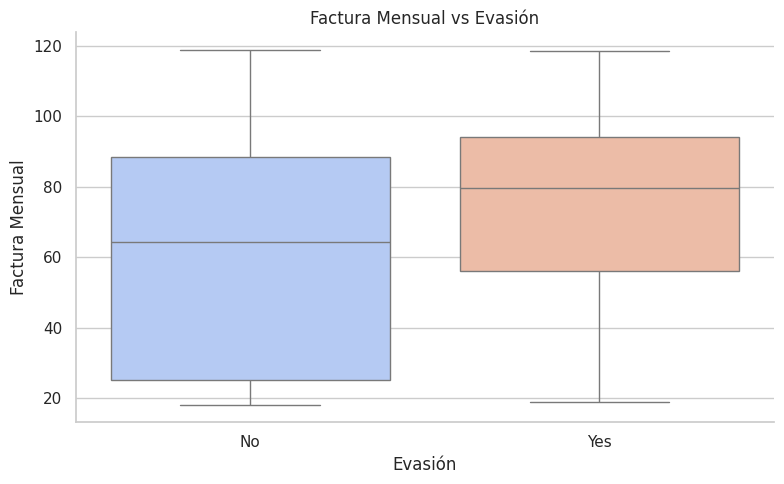

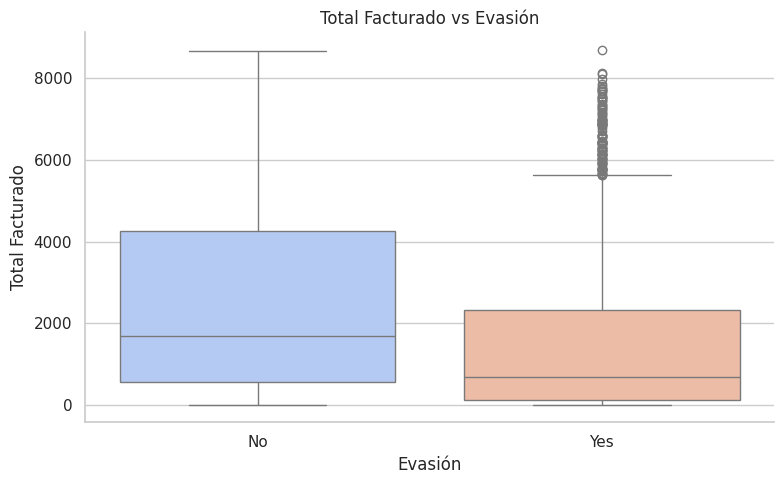

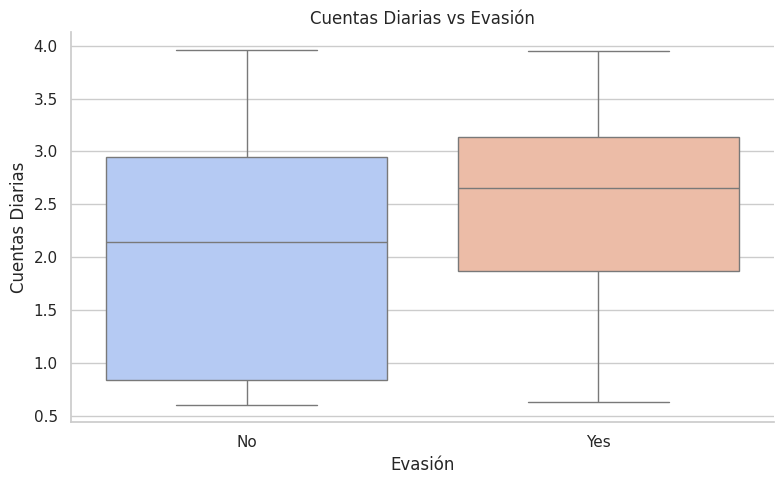

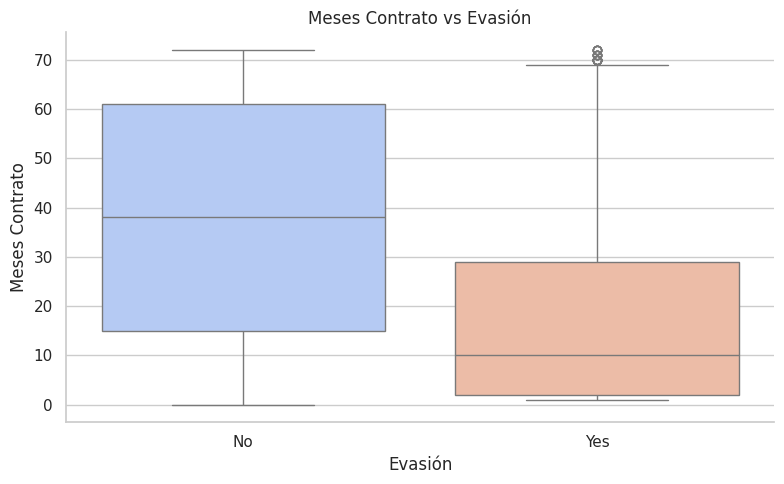

In [87]:
# Variables numéricas clave
numericas = ['Factura_Mensual', 'Total_Facturado', 'Cuentas_Diarias', 'Meses_Contrato']

for col in numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=datacom_exp, x='Evasion', y=col, hue='Evasion', palette='coolwarm', legend=False)
    plt.title(f'{col.replace("_", " ").title()} vs Evasión')
    plt.xlabel('Evasión')
    plt.ylabel(col.replace("_", " ").title())
    sns.despine()
    plt.tight_layout()
    plt.show()


## **🔹6. Análisis de Correlación**

Se construyó una matriz de correlación entre variables numéricas.

* total_facturado y tiempo_contrato muestran alta correlación positiva.

* Se destaca la correlación inversa entre tiempo_contrato y Evasion.

---

### Análisis de Correlación entre Variables

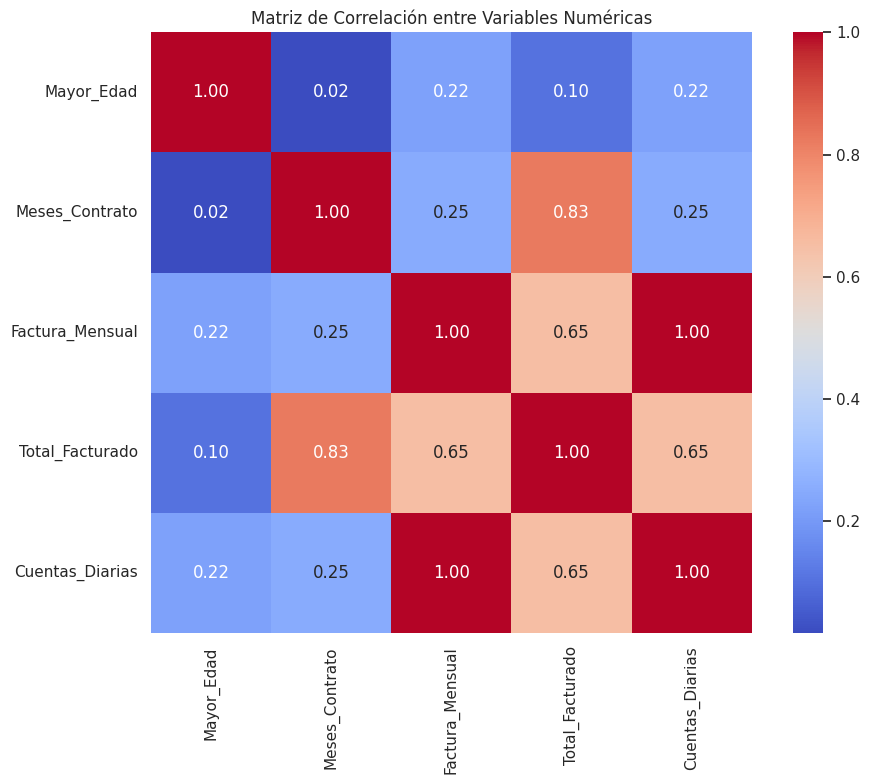

In [88]:
# Seleccionamos solo columnas numéricas
matrix_correlacional = datacom_exp.select_dtypes(include='number').corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_correlacional, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()


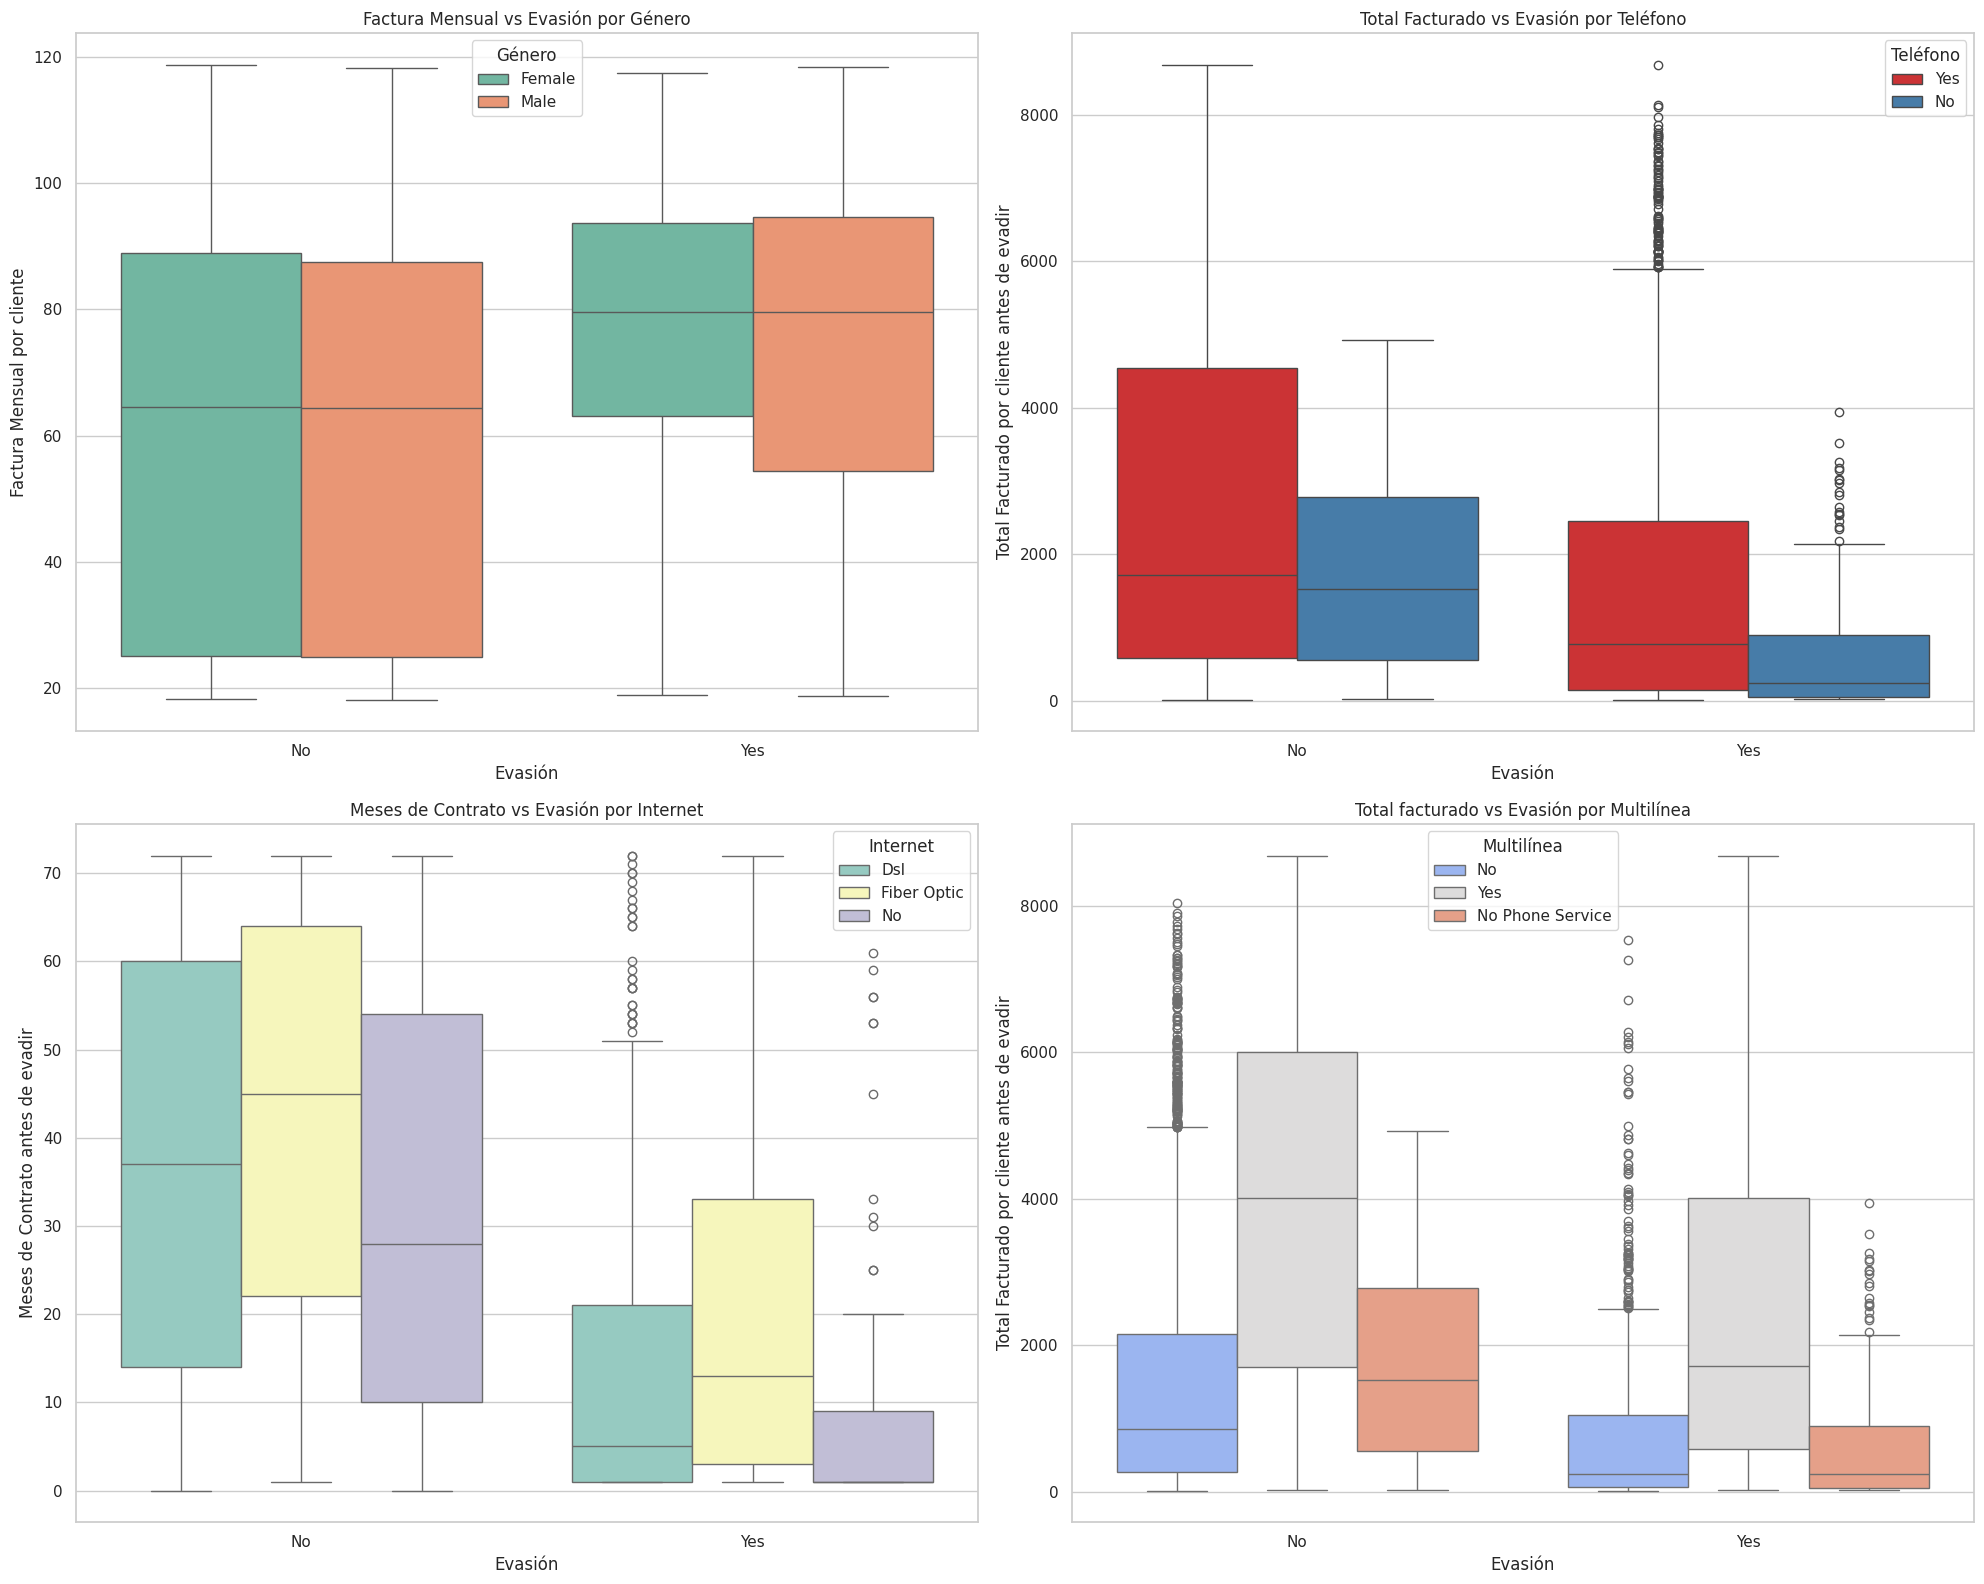

In [93]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 16))

# Gráfico 1: Factura Mensual vs Evasión por Género
plt.subplot(2, 2, 1)
sns.boxplot(data=datacom_exp, x='Evasion', y='Factura_Mensual', hue='Genero', palette='Set2')
plt.title('Factura Mensual vs Evasión por Género')
plt.xlabel('Evasión')
plt.ylabel('Factura Mensual por cliente')
plt.legend(title='Género')

# Gráfico 2: Total Gastado vs Evasión por Teléfono
plt.subplot(2, 2, 2)
sns.boxplot(data=datacom_exp, x='Evasion', y='Total_Facturado', hue='Servicio_Telefonia', palette='Set1')
plt.title('Total Facturado vs Evasión por Teléfono')
plt.xlabel('Evasión')
plt.ylabel('Total Facturado por cliente antes de evadir')
plt.legend(title='Teléfono')

# Gráfico 3: Meses de Contrato vs Evasión por Internet
plt.subplot(2, 2, 3)
sns.boxplot(data=datacom_exp, x='Evasion', y='Meses_Contrato', hue='Servicio_Internet', palette='Set3')
plt.title('Meses de Contrato vs Evasión por Internet')
plt.xlabel('Evasión')
plt.ylabel('Meses de Contrato antes de evadir')
plt.legend(title='Internet')

# Gráfico 4: Total Gastado vs Evasión por Multilinea
plt.subplot(2, 2, 4)
sns.boxplot(data=datacom_exp, x='Evasion', y='Total_Facturado', hue='MultiServicios', palette='coolwarm')
plt.title('Total facturado vs Evasión por Multilínea')
plt.xlabel('Evasión')
plt.ylabel('Total Facturado por cliente antes de evadir')
plt.legend(title='Multilínea')

# Ajustar diseño
plt.tight_layout()
plt.show()


promedio de tiempo que estan los clientes en la empresa antes de evadir.

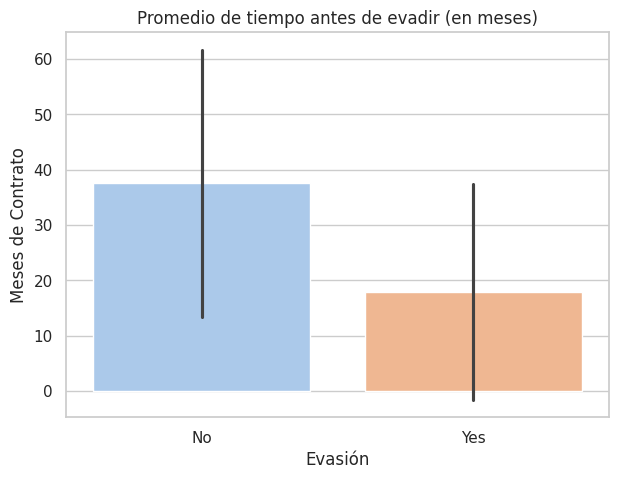

In [96]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.barplot(data=datacom_exp, x='Evasion', y='Meses_Contrato', hue='Evasion', palette='pastel', errorbar='sd', legend=False)
plt.title('Promedio de tiempo antes de evadir (en meses)')
plt.xlabel('Evasión')
plt.ylabel('Meses de Contrato')
plt.show()



Género más propenso a evadir

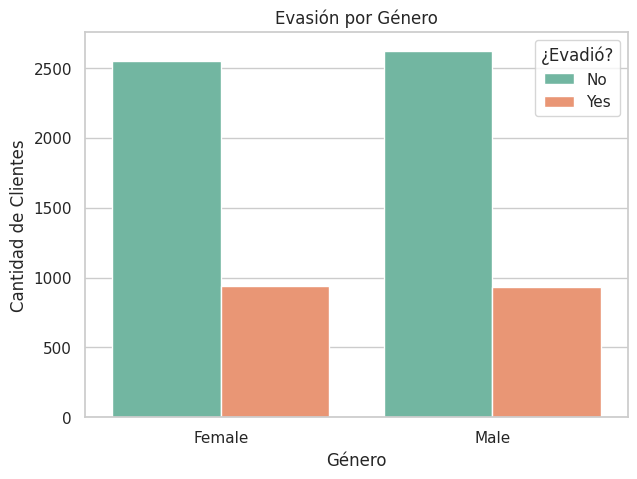

In [91]:
# Recuento de evasión por género
plt.figure(figsize=(7, 5))
sns.countplot(data=datacom_exp, x='Genero', hue='Evasion', palette='Set2')
plt.title('Evasión por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='¿Evadió?')
plt.show()


Cantidad de clientes con servicios de Telefonía, Internet y Multilínea

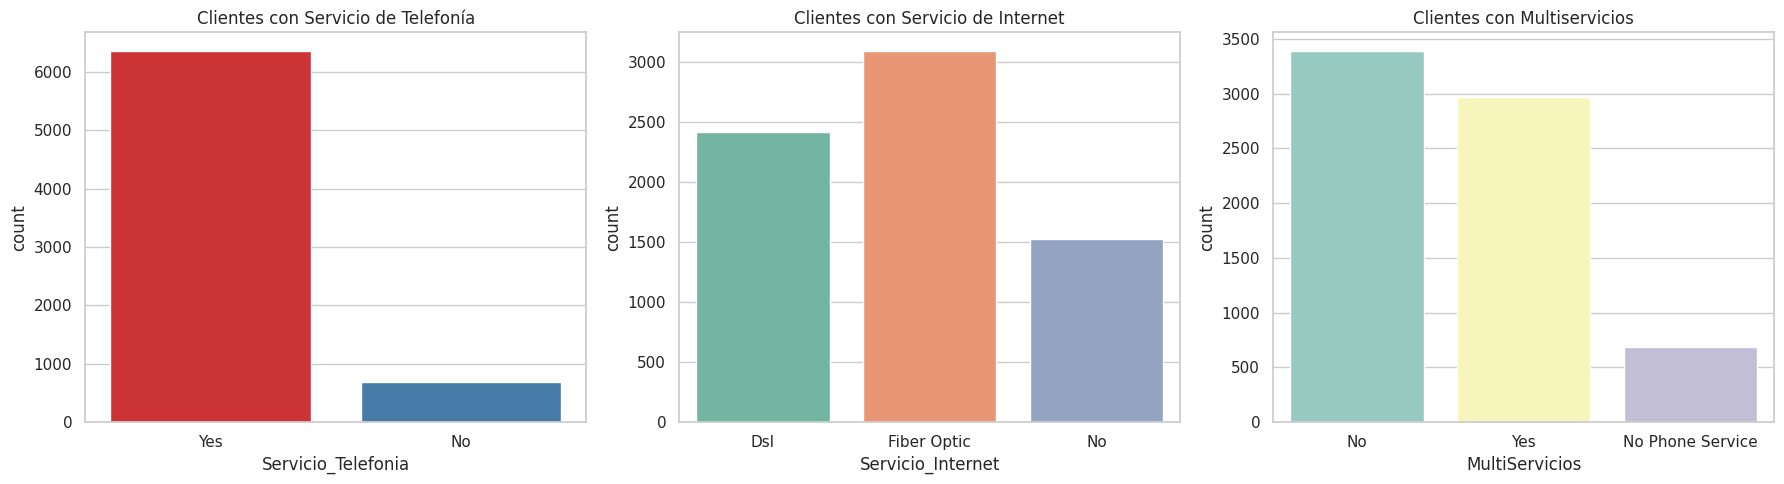

In [94]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Servicio Telefonía
sns.countplot(data=datacom_exp, x='Servicio_Telefonia', hue='Servicio_Telefonia',
              palette='Set1', legend=False, ax=axs[0])
axs[0].set_title('Clientes con Servicio de Telefonía')

# Servicio Internet
sns.countplot(data=datacom_exp, x='Servicio_Internet', hue='Servicio_Internet',
              palette='Set2', legend=False, ax=axs[1])
axs[1].set_title('Clientes con Servicio de Internet')

# MultiServicios
sns.countplot(data=datacom_exp, x='MultiServicios', hue='MultiServicios',
              palette='Set3', legend=False, ax=axs[2])
axs[2].set_title('Clientes con Multiservicios')

plt.tight_layout()
plt.show()



## **🔹7. Insights Clave**

* Los contratos más cortos y pagos mensuales están más asociados a la evasión.

* Clientes con menos tiempo en la empresa y menor total facturado son más propensos a abandonar el servicio.

* La falta de ciertos servicios (como multiservicios o internet) se asocia a mayor tasa de cancelación.

## **🔹8. Recomendaciones**

* Incentivar a nuevos clientes a optar por contratos a largo plazo con beneficios escalables.

* Promover paquetes que incluyan servicios adicionales (internet, multilínea).

* Implementar alertas de retención para clientes con baja antigüedad y gasto mensual elevado.

## **🔹9. Conclusión**

El análisis exploratorio de datos de Telecom X proporciona información valiosa sobre los factores que influyen en la evasión de clientes. Estos hallazgos pueden usarse para desarrollar estrategias de retención más efectivas, incrementar la satisfacción del cliente y mejorar la rentabilidad del negocio.